# Q2

### Read data

In [1]:
import scipy.io
import numpy as np

GLI_85 = scipy.io.loadmat('./data/GLI_85.mat')
ids2 = scipy.io.loadmat('./data/ids2.mat')
lung = scipy.io.loadmat('./data/lung.mat')
nci9 = scipy.io.loadmat('./data/nci9.mat')
USPS = scipy.io.loadmat('./data/USPS.mat')

In [2]:
GLI_85_X = GLI_85['X']
GLI_85_Y = GLI_85['Y']

ids2_X = ids2['data']
ids2_Y = ids2['label']

lung_X = lung['X']
lung_Y = lung['Y']

nci9_X = nci9['X']
nci9_Y = nci9['Y']

USPS_X = USPS['X']
USPS_Y = USPS['Y']

In [21]:
len(GLI_85_X[0]), len(np.unique(GLI_85_Y))

(22283, 2)

In [22]:
len(ids2_X[0]), len(np.unique(ids2_Y))

(2, 5)

In [23]:
len(lung_X[0]), len(np.unique(lung_Y))

(3312, 5)

In [24]:
len(nci9_X[0]), len(np.unique(nci9_Y))

(9712, 9)

In [25]:
len(USPS_X[0]), len(np.unique(USPS_Y))

(256, 10)

## Function

In [3]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix, normalized_mutual_info_score
from sklearn.preprocessing import normalize
from munkres import Munkres

In [4]:
def f_matrix(labels_pred, labels_true):
    cont_mat = contingency_matrix(labels_pred=labels_pred, labels_true=labels_true)
    precision = normalize(cont_mat, norm='l1', axis=0)
    recall = normalize(cont_mat, norm='l1', axis=1)
    som = precision + recall
    f1 =  np.round(np.divide((2 * recall * precision), som, out=np.zeros_like(som), where=som!=0), 3)
    return f1

def f1_hungarian(f1):
    m = Munkres()
    inverse = 1 - f1
    indices = m.compute(inverse.tolist())
    fscore = sum([f1[i] for i in indices])/len(indices)
    return fscore

In [5]:
def MySOMPlot(data, target, sigma=1.0, learning_rate=0.5, topology='rectangular', n_neurons=(10, 10), epoch=1000):
  target = target.flatten()
  som = MiniSom(n_neurons[0], n_neurons[1], data.shape[1], sigma=sigma, learning_rate=learning_rate,
                neighborhood_function='gaussian', random_seed=42, topology=topology)

  som.pca_weights_init(data)
  som.train(data, epoch, verbose=True)

  som.topographic_error(data[:100])

  figsize = (10, 10)
  plt.figure(figsize=figsize)

  plt.pcolor(som.distance_map().T, cmap='bone_r')
  plt.colorbar()

  # markers = ['o', 's', 'D', 'v', 'p']
  markers = ['.', 'o', 'v', '1', '2', 's', 'p', '*', 'h', '+', 'x', 'D']
  colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
  # 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'pink', 'orange'
  
  clustered_labels = np.array([som.winner(xx) for xx in data])
  clustered_labels_flat = clustered_labels[:, 0] * n_neurons[1] + clustered_labels[:, 1]

  print(f'\nF1-Score : {f1_hungarian(f_matrix(clustered_labels_flat, target))}')
  print(f'Normalized Mutual Information : {normalized_mutual_info_score(target, clustered_labels_flat)}\n')

  for cnt, xx in enumerate(data):
      w = som.winner(xx)
      plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
               markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)

  plt.show()
  plt.close()

  plt.figure(figsize=figsize)
  frequencies = som.activation_response(data)
  plt.pcolor(frequencies.T, cmap='Blues')
  plt.colorbar()
  plt.show()
  plt.close()

## 1

In [ ]:
sigma = 0.5
learning_rate = 0.5
topology = 'rectangular'

In [ ]:
MySOMPlot(data=GLI_85_X, target=GLI_85_Y, sigma=8, learning_rate=0.4, n_neurons=(40, 40), epoch=100)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.7124393336670019

F1-Score : 0.48919999999999997
Normalized Mutual Information : 0.41545482745883305



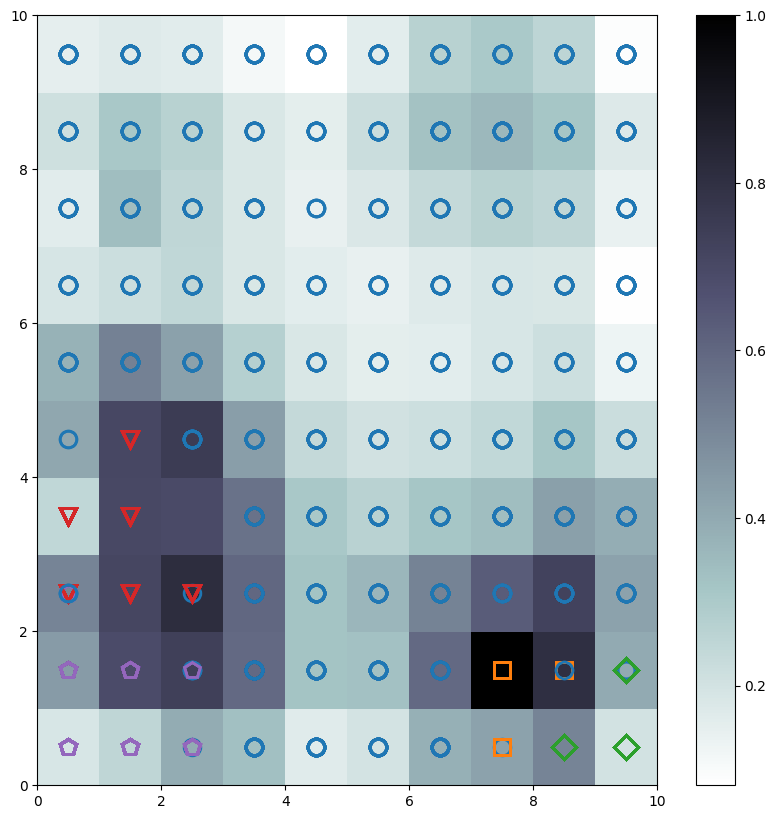

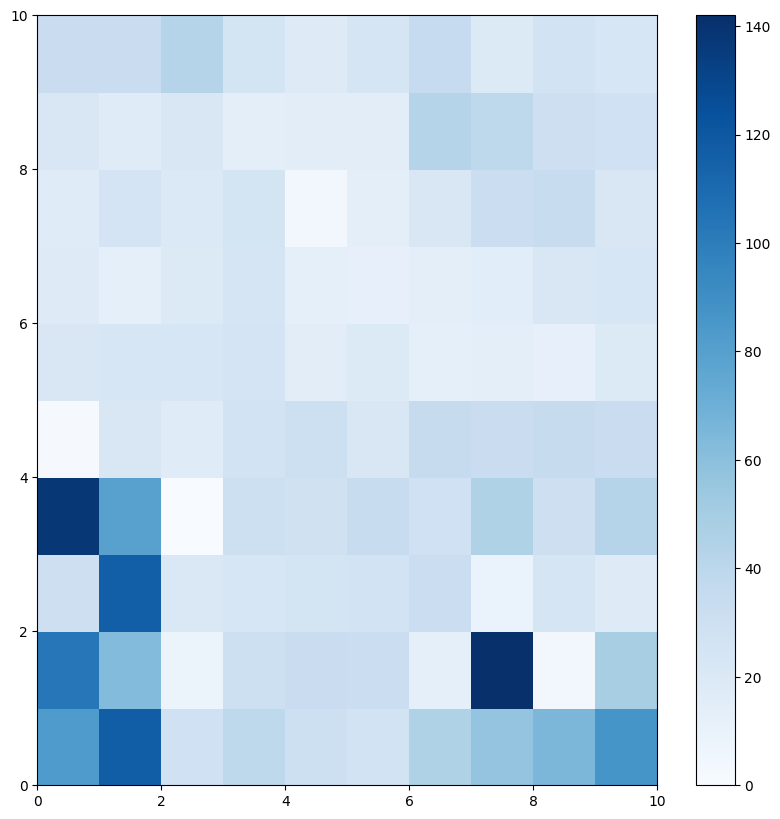

In [ ]:
MySOMPlot(data=ids2_X, target=ids2_Y)

/usr/local/lib/python3.10/dist-packages/minisom.py:384: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[:, pc_order[0]] + \


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 12.273382606594092

F1-Score : 0.6316
Normalized Mutual Information : 0.43110906131237026



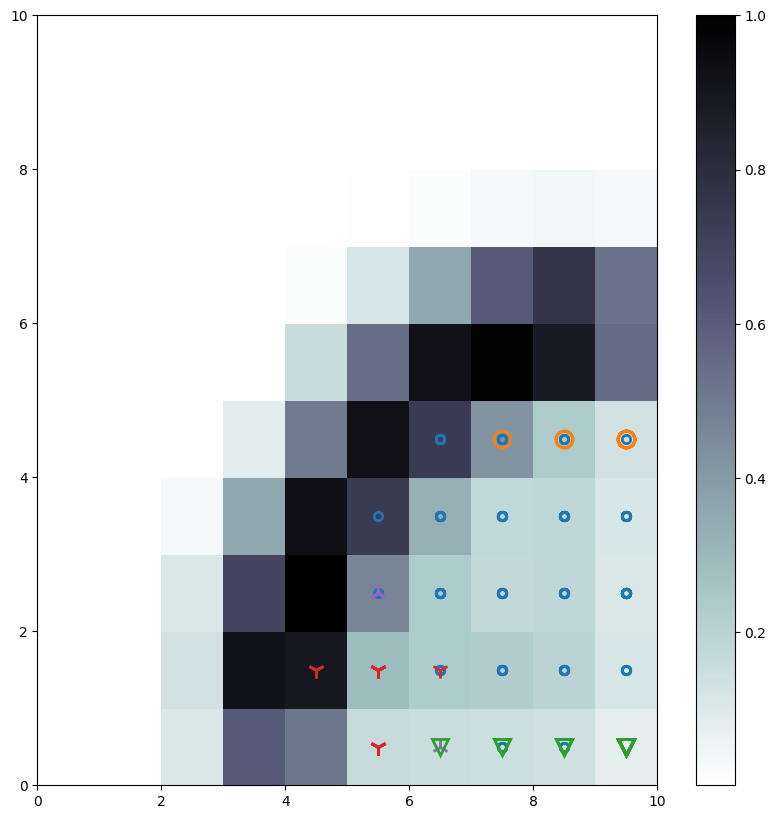

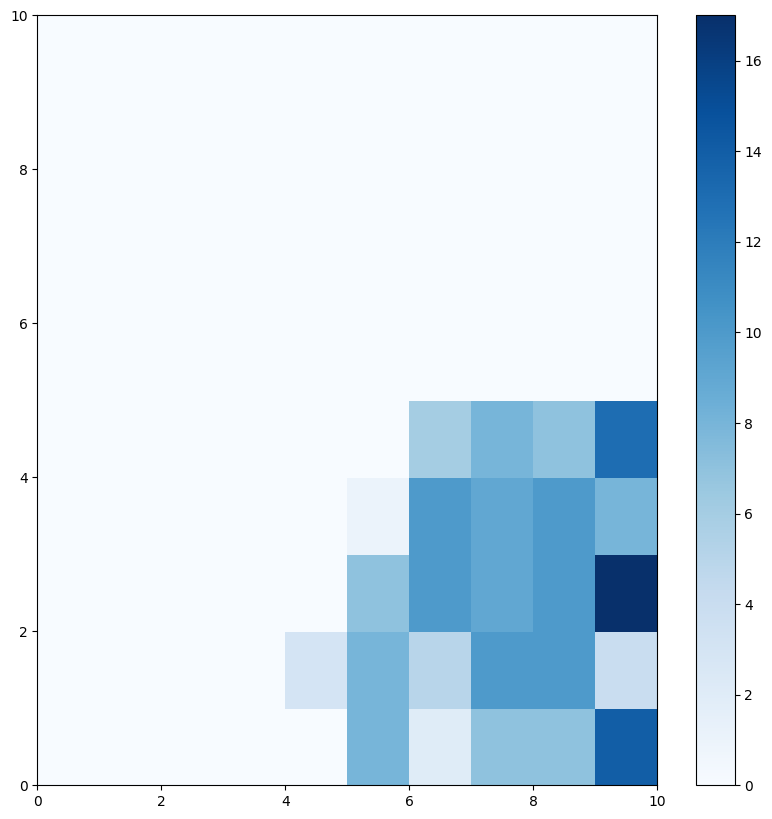

In [ ]:
MySOMPlot(data=lung_X, target=lung_Y)

/usr/local/lib/python3.10/dist-packages/minisom.py:384: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[:, pc_order[0]] + \


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 31.291003053585904

F1-Score : 0.35800000000000004
Normalized Mutual Information : 0.6637708299324862



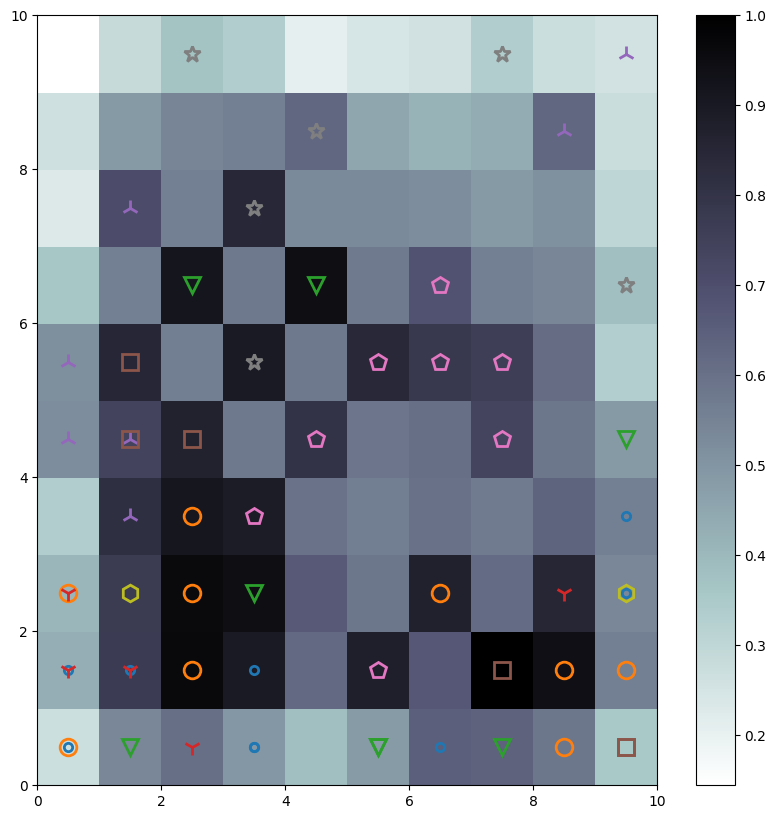

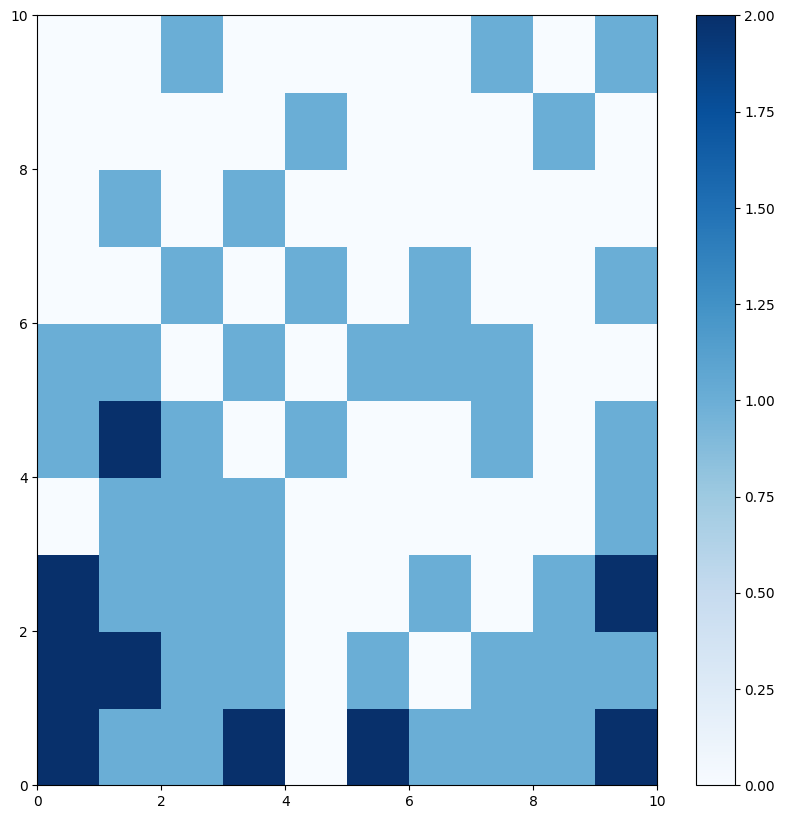

In [ ]:
MySOMPlot(data=nci9_X, target=nci9_Y)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 5.058356819691153

F1-Score : 0.4704
Normalized Mutual Information : 0.5844263726988748



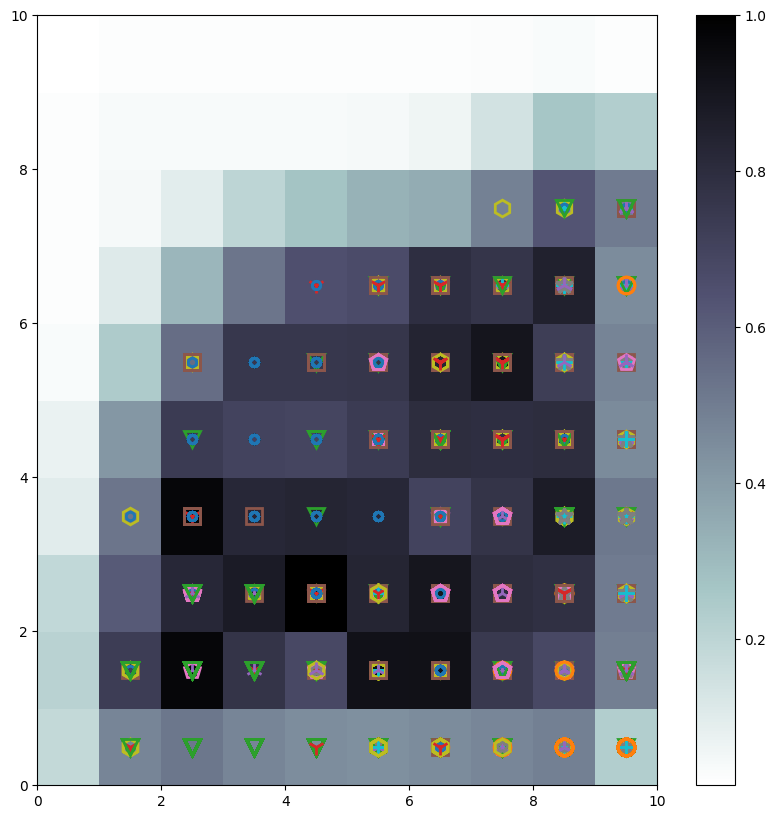

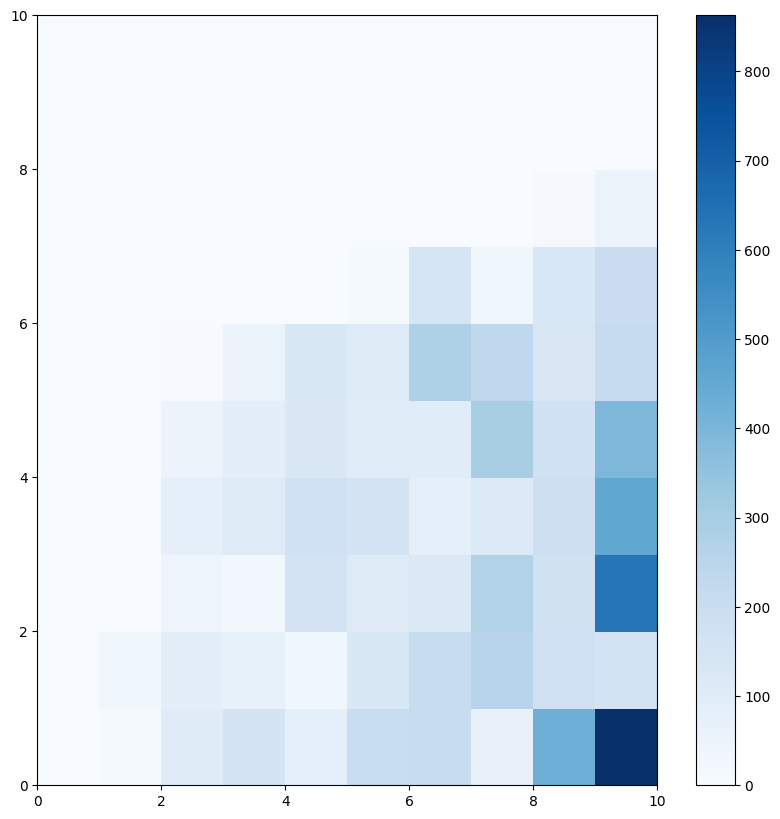

In [ ]:
MySOMPlot(data=USPS_X, target=USPS_Y)

## 2

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.744093492035727

F1-Score : 0.5338
Normalized Mutual Information : 0.4199428842321102



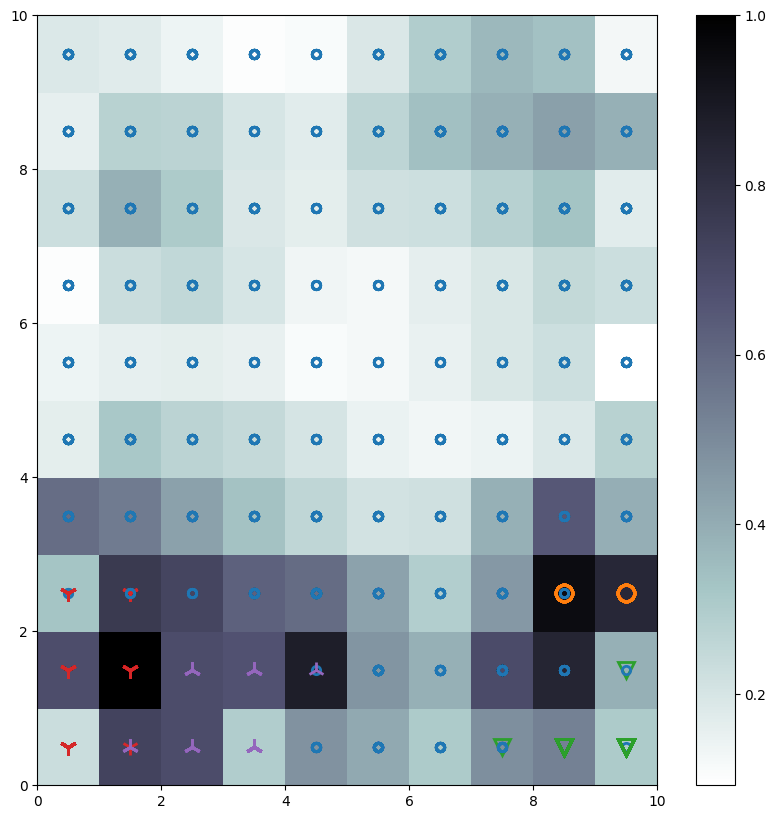

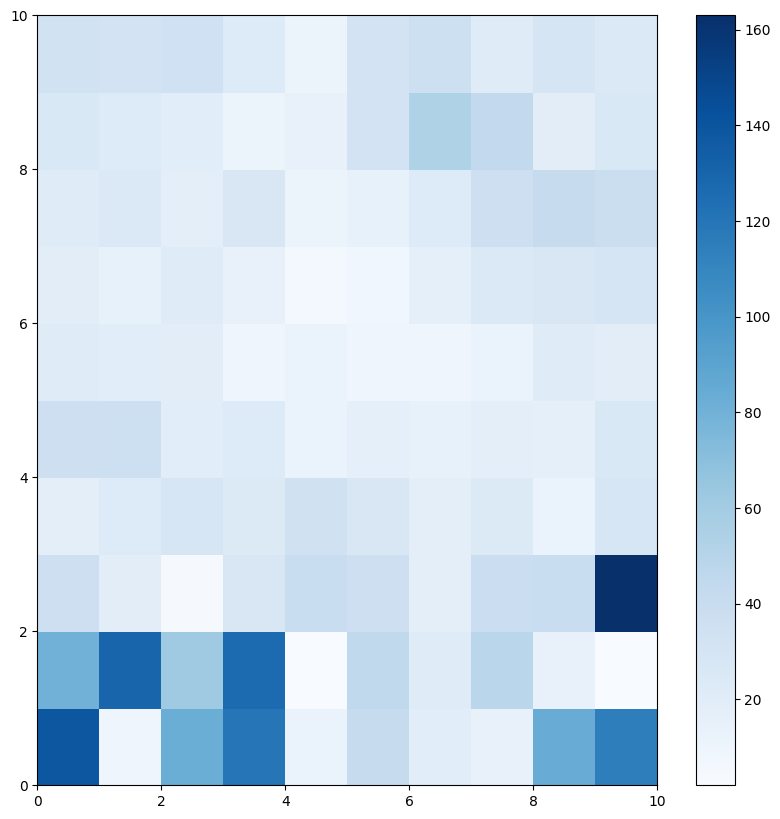

In [ ]:
MySOMPlot(data=ids2_X, target=ids2_Y, topology='hexagonal')

/usr/local/lib/python3.10/dist-packages/minisom.py:384: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[:, pc_order[0]] + \


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 12.256509923509988

F1-Score : 0.6344000000000001
Normalized Mutual Information : 0.4329492549448857



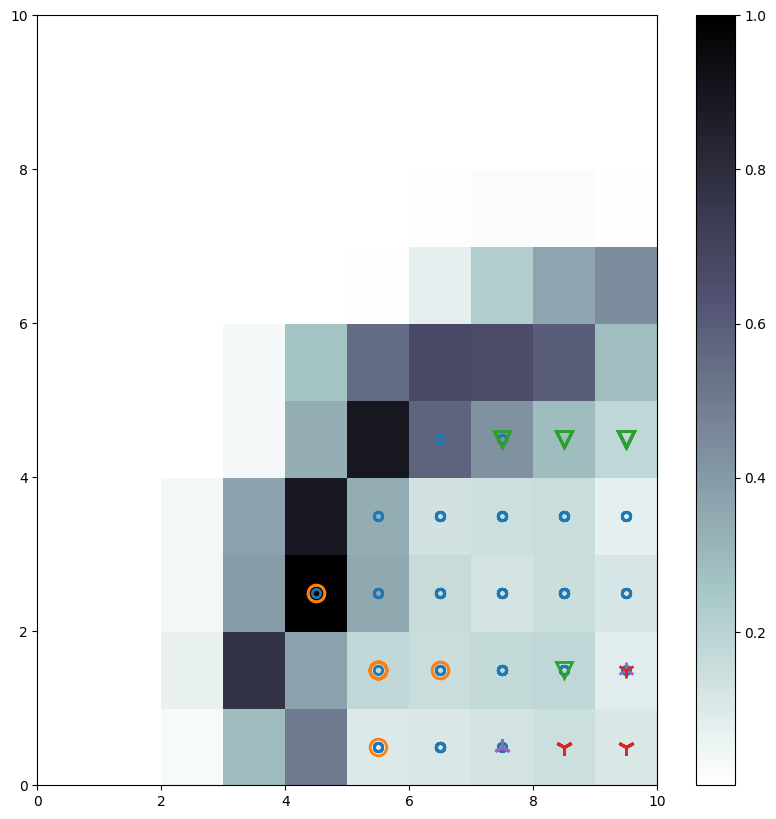

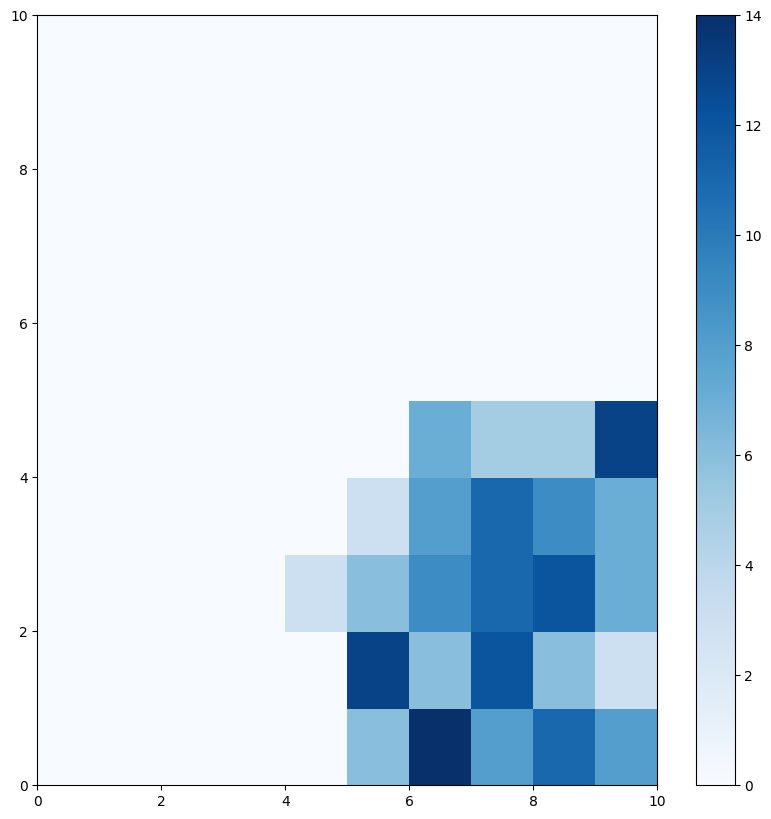

In [ ]:
MySOMPlot(data=lung_X, target=lung_Y, topology='hexagonal')

## 3

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

In [4]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [5]:
def evaluationWithMLP(data, labels, learning_rate, hidden_size):
    labels = labels.flatten()

    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

    X_train = torch.Tensor(X_train)
    y_train = torch.LongTensor(y_train - 1)
    X_test = torch.Tensor(X_test)
    y_test = torch.LongTensor(y_test - 1)

    input_size = X_train.shape[1]
    output_size = len(np.unique(labels))
    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(1000):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, y_pred = torch.max(outputs, 1)

    accuracy = accuracy_score(y_test.numpy(), y_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_pred.numpy(), average='weighted')

    return accuracy, f1

In [86]:
def fine_tuning_MLP(data, learning_rate, hidden_size):
  for name, (d, target) in data.items():
    acc_m = 0
    acc_info = None
    f1_m = 0
    f1_info = None
    for l in learning_rate:
      for h in hidden_size:
        accuracy, f1 = evaluationWithMLP(d, target, l, h)
        if accuracy > acc_m:
          acc_m = accuracy
          acc_info = [l, h, f1]
        if f1 > f1_m:
          f1_m = f1
          f1_info = [l, h, accuracy]
    print(f'Dataset {name}')
    print(f'Best Accuracy information : Accuracy = {acc_m}, F1-Socre = {acc_info[-1]}  -->  MLP Learning Rate = {acc_info[0]}, and Hidden Layer Size = {acc_info[1]}')
    print(f'Best F1-Score information : F1-Socre = {f1_m}, Accuracy = {f1_info[-1]}  -->  MLP Learning Rate = {f1_info[0]}, and Hidden Layer Size = {f1_info[1]}\n')

In [87]:
learning_rate = [0.1, 0.01, 0.001, 0.0001, 1.0, 1.5]
hidden_size = [10, 40, 50, 60, 100, 5, 4]

In [88]:
data = {'ids2': (ids2_X, ids2_Y), 'lung': (lung_X, lung_Y), 'nci9': (nci9_X, nci9_Y), 'USPS': (USPS_X, USPS_Y), 'GLI_85': (GLI_85_X, GLI_85_Y)}

In [89]:
fine_tuning_MLP(data, learning_rate, hidden_size)

Dataset ids2
Best Accuracy information : Accuracy = 0.9984375, F1-Socre = 0.9984375567047723  -->  MLP Learning Rate = 0.1, and Hidden Layer Size = 10
Best F1-Score information : F1-Socre = 0.9984375567047723, Accuracy = 0.9984375  -->  MLP Learning Rate = 0.1, and Hidden Layer Size = 10

Dataset lung
Best Accuracy information : Accuracy = 0.975609756097561, F1-Socre = 0.9733924611973391  -->  MLP Learning Rate = 0.001, and Hidden Layer Size = 40
Best F1-Score information : F1-Socre = 0.9733924611973391, Accuracy = 0.975609756097561  -->  MLP Learning Rate = 0.001, and Hidden Layer Size = 40

Dataset nci9
Best Accuracy information : Accuracy = 0.75, F1-Socre = 0.8055555555555555  -->  MLP Learning Rate = 0.1, and Hidden Layer Size = 40
Best F1-Score information : F1-Socre = 0.8055555555555555, Accuracy = 0.75  -->  MLP Learning Rate = 0.1, and Hidden Layer Size = 40

Dataset USPS
Best Accuracy information : Accuracy = 0.9661290322580646, F1-Socre = 0.9661948127287546  -->  MLP Learning

## 4

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from minisom import MiniSom
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

In [11]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [18]:
def som_feature_extraction(data, sigma, learning_rate, topology, neighborhood_function, som_shape=(10, 10), num_epochs=100):
    som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=sigma, learning_rate=learning_rate,
                neighborhood_function=neighborhood_function, random_seed=42, topology=topology)
    som.train(data, num_epochs, verbose=False)
    som_features = np.array([som.winner(x) for x in data])
    return som_features

In [13]:
def SOM_MLP(data, labels, hidden_size, learning_rate_mlp, sigma, learning_rate, topology, neighborhood_function):
    data = som_feature_extraction(data, sigma=sigma, learning_rate=learning_rate, topology=topology, neighborhood_function=neighborhood_function)
    labels = labels.flatten()

    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
    X_train = torch.Tensor(X_train)
    y_train = torch.LongTensor(y_train - 1)
    X_test = torch.Tensor(X_test)
    y_test = torch.LongTensor(y_test - 1)

    input_size = X_train.shape[1]
    output_size = len(np.unique(labels))
    model = MLP(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate_mlp)

    for epoch in range(1000):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, y_pred = torch.max(outputs, 1)

    accuracy = accuracy_score(y_test.numpy(), y_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_pred.numpy(), average='weighted')

    return accuracy, f1

In [90]:
def fine_tuning_MLP(data, learning_rate_mlp, hidden_size, neighborhood_functions, topology, sigma, learning_rate):
  for name, (d, target) in data.items():
    acc_m = 0
    acc_info = None
    f1_m = 0
    f1_info = None
    for l in learning_rate_mlp:
      for h in hidden_size:
        for nf in neighborhood_functions:
          for t in topology:
            for s in sigma:
              for lr in learning_rate:
                accuracy, f1 = SOM_MLP(d, target, h, l, s, lr, t, nf)
                if accuracy > acc_m:
                  acc_m = accuracy
                  acc_info = [l, h, nf, t, s, lr, f1]
                if f1 > f1_m:
                  f1_m = f1
                  f1_info = [l, h, nf, t, s, lr, accuracy]
    print(f'Dataset {name}')
    print(f'Best Accuracy information : Accuracy = {acc_m}, F1-Socre = {acc_info[-1]}  -->  MLP Learning Rate = {acc_info[0]}, Hidden Layer Size = {acc_info[1]}, NF = {acc_info[2]}, Topology = {acc_info[3]}, Radius = {acc_info[4]}, and SOM Learning Rate = {acc_info[5]}')
    print(f'Best F1-Score information : F1-Socre = {f1_m}, Accuracy = {f1_info[-1]}  -->  MLP Learning Rate = {f1_info[0]}, Hidden Layer Size = {f1_info[1]}, NF = {f1_info[2]}, Topology = {f1_info[3]}, Radius = {f1_info[4]}, and SOM Learning Rate = {f1_info[5]}')

In [91]:
learning_rate_mlp = [0.1, 0.01, 0.001]
hidden_size = [10, 40, 50, 60, 100]

learning_rate = [0.1, 0.4, 0.5, 0.8]
sigma = [1, 2, 5, 7]
neighborhood_functions = ['gaussian', 'mexican_hat']
topology = ['rectangular', 'hexagonal']

In [92]:
data = {'ids2': (ids2_X, ids2_Y), 'lung': (lung_X, lung_Y), 'nci9': (nci9_X, nci9_Y), 'USPS': (USPS_X, USPS_Y), 'GLI_85': (GLI_85_X, GLI_85_Y)}

In [93]:
fine_tuning_MLP(data, learning_rate_mlp, hidden_size, neighborhood_functions, topology, sigma, learning_rate)

Dataset ids2
Best Accuracy information : Accuracy = 1.0, F1-Socre = 1.0  -->  MLP Learning Rate = 0.1, Hidden Layer Size = 10, NF = gaussian, Topology = rectangular, Radius = 5, and SOM Learning Rate = 0.5
Best F1-Score information : F1-Socre = 1.0, Accuracy = 1.0  -->  MLP Learning Rate = 0.1, Hidden Layer Size = 10, NF = gaussian, Topology = rectangular, Radius = 5, and SOM Learning Rate = 0.5
Dataset lung
Best Accuracy information : Accuracy = 0.926829268292683, F1-Socre = 0.9268563384856934  -->  MLP Learning Rate = 0.01, Hidden Layer Size = 40, NF = gaussian, Topology = hexagonal, Radius = 7, and SOM Learning Rate = 0.8
Best F1-Score information : F1-Socre = 0.9268563384856934, Accuracy = 0.926829268292683  -->  MLP Learning Rate = 0.01, Hidden Layer Size = 40, NF = gaussian, Topology = hexagonal, Radius = 7, and SOM Learning Rate = 0.8
Dataset nci9
Best Accuracy information : Accuracy = 0.75, F1-Socre = 0.78015873015873  -->  MLP Learning Rate = 0.01, Hidden Layer Size = 40, NF =

# Fine tuning 1 and 2

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

In [76]:
def plotUMatrix(plt, som, data, target):
    markers = ['.', 'o', 'v', '1', '2', 's', 'p', '*', 'h', '+', 'x', 'D']
    colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']
    plt.pcolor(som.distance_map().T, cmap='bone_r')
    plt.colorbar()
    for cnt, xx in enumerate(data):
        w = som.winner(xx)
        plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
                markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)
    plt.show()

In [84]:
def fine_tuning(data, neighborhood_functions, topology, sigma, learning_rate, n_neurons=(10, 10)):
  for name, (d, target) in data.items():
    for t in topology:
      f1_m = 0
      f1_info = None 
      nmi_m = 0
      nmi_info = None
      for nf in neighborhood_functions:
        for s in sigma:
          for l in learning_rate:
            som = MiniSom(x=n_neurons[0], y=n_neurons[1], input_len=d.shape[1], sigma=s, learning_rate=l, topology=t, neighborhood_function=nf)
            som.train(d, 1000)

            clustered_labels = np.array([som.winner(xx) for xx in d])
            clustered_labels_flat = clustered_labels[:, 0] * n_neurons[1] + clustered_labels[:, 1]

            f1 = f1_hungarian(f_matrix(clustered_labels_flat, target.flatten()))
            nmi = normalized_mutual_info_score(target.flatten(), clustered_labels_flat)

            if f1 > f1_m:
              f1_m = f1
              f1_info = [som, nf, t, s, l, nmi]
            if nmi > nmi_m:
              nmi_m = nmi
              nmi_info = [som, nf, t, s, l, f1]

      print(f'Dataset {name}')
      print(f'Best F1-Score information : F1-Score = {f1_m}, NMI = {f1_info[-1]}  -->')
      plt.title(f'SOM U-matrix with NS = {f1_info[1]}, Topology = {f1_info[2]}, Radius = {f1_info[3]}, Learning rate = {f1_info[4]}\n')
      plotUMatrix(plt, f1_info[0], d, target.flatten())
      print(f'Best NMI information : NMI = {nmi_m}, F1-Socre = {nmi_info[-1]}  -->')
      plt.title(f'SOM U-matrix with NS = {nmi_info[1]}, Topology = {nmi_info[2]}, Radius = {nmi_info[3]}, Learning rate = {nmi_info[4]}\n')
      plotUMatrix(plt, nmi_info[0], d, target.flatten())


F1-Score : 0.768
Normalized Mutual Information : 0.4734527291111342



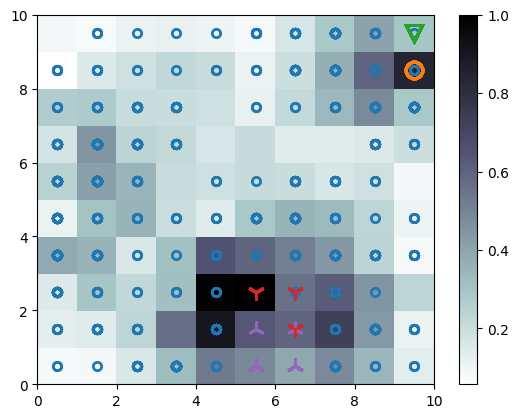

In [80]:
d = ids2_X
target = ids2_Y

som = MiniSom(x=10, y=10, input_len=d.shape[1], sigma=1, learning_rate=0.1, topology='hexagonal', neighborhood_function='gaussian')
som.train(d, 1000)
u_matrix = som.distance_map().T

clustered_labels = np.array([som.winner(xx) for xx in d])
clustered_labels_flat = clustered_labels[:, 0] * 10 + clustered_labels[:, 1]

target = target.flatten()

plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

markers = ['.', 'o', 'v', '1', '2', 's', 'p', '*', 'h', '+', 'x', 'D']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9']

clustered_labels = np.array([som.winner(xx) for xx in d])
clustered_labels_flat = clustered_labels[:, 0] * 10 + clustered_labels[:, 1]

print(f'\nF1-Score : {f1_hungarian(f_matrix(clustered_labels_flat, target))}')
print(f'Normalized Mutual Information : {normalized_mutual_info_score(target, clustered_labels_flat)}\n')

for cnt, xx in enumerate(d):
    w = som.winner(xx)
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
            markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()

In [74]:
learning_rate = [0.1, 0.4, 0.5, 0.8]
radius = [1, 2, 5, 7]
neighborhood_functions = ['gaussian']#, 'mexican_hat']
topology = ['rectangular', 'hexagonal']

In [25]:
data = {'ids2': (ids2_X, ids2_Y), 'lung': (lung_X, lung_Y), 'nci9': (nci9_X, nci9_Y), 'USPS': (USPS_X, USPS_Y), 'GLI_85': (GLI_85_X, GLI_85_Y)}

Dataset ids2
Best F1-Score information : F1-Score = 0.7857999999999998, NMI = 0.4719686504959664  -->


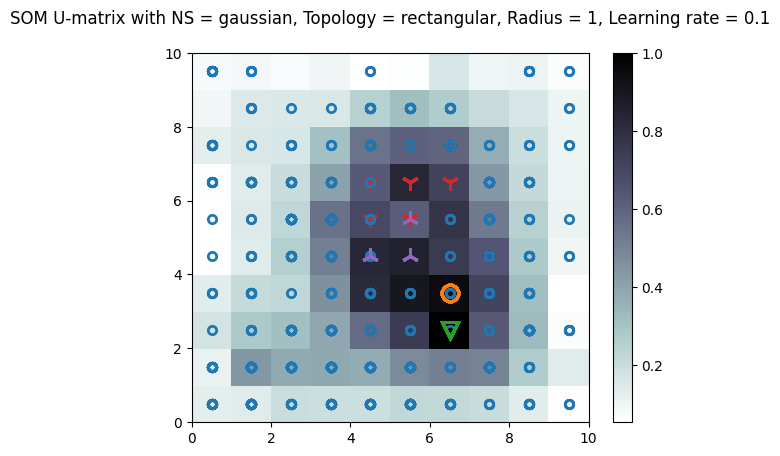

Best NMI information : NMI = 0.4719686504959664, F1-Socre = 0.7857999999999998  -->


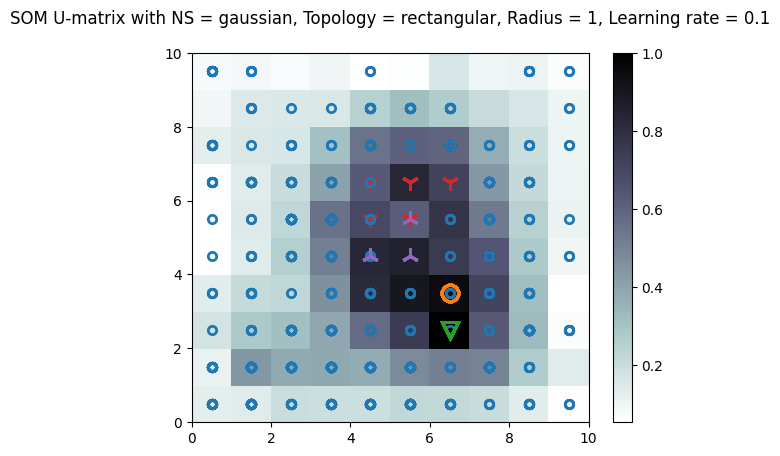

Dataset ids2
Best F1-Score information : F1-Score = 0.7859999999999999, NMI = 0.47574296045996317  -->


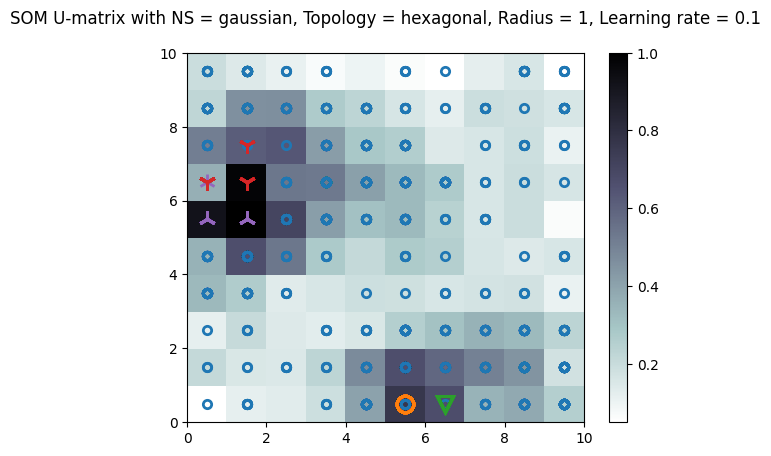

Best NMI information : NMI = 0.47574296045996317, F1-Socre = 0.7859999999999999  -->


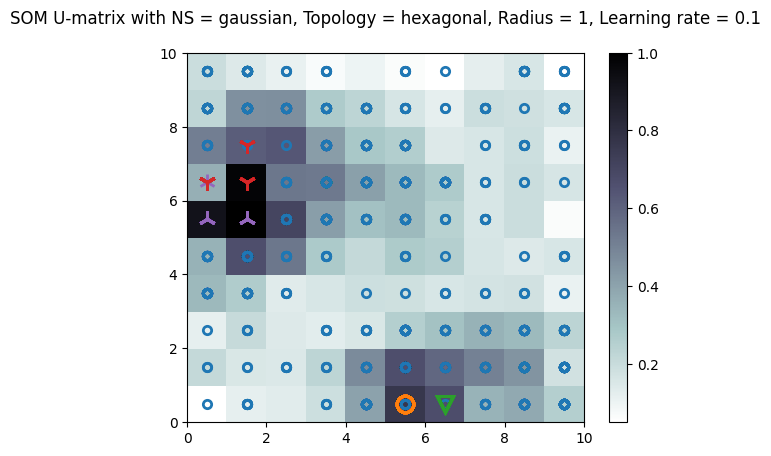

Dataset lung
Best F1-Score information : F1-Score = 0.7234, NMI = 0.3976012568303865  -->


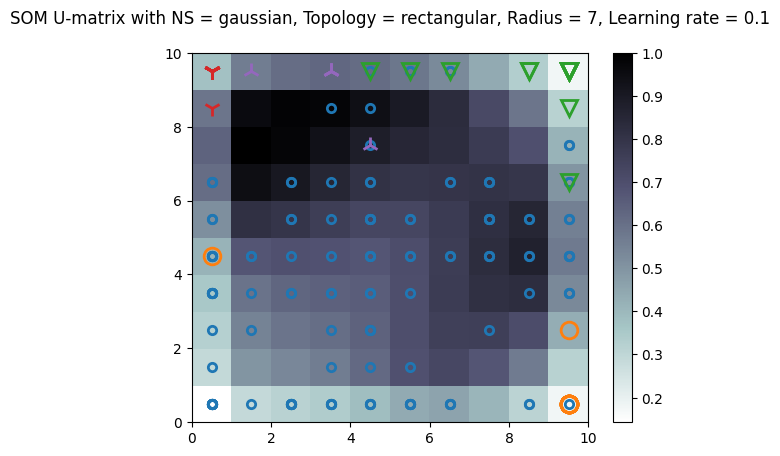

Best NMI information : NMI = 0.5186954860930411, F1-Socre = 0.6922  -->


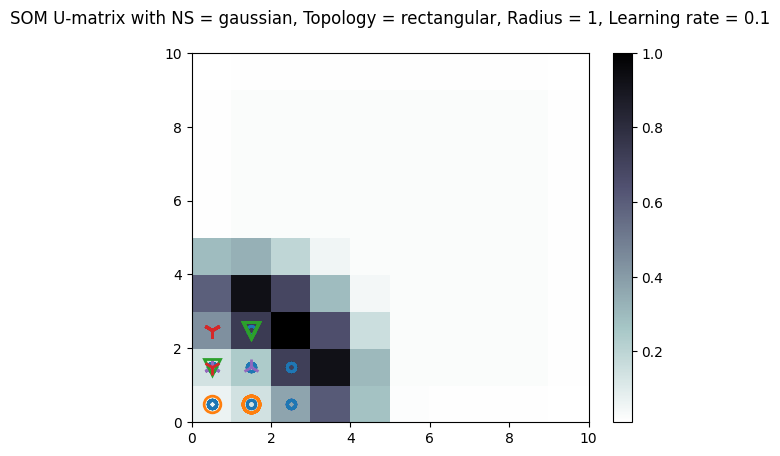

Dataset lung
Best F1-Score information : F1-Score = 0.7310000000000001, NMI = 0.4055919032982096  -->


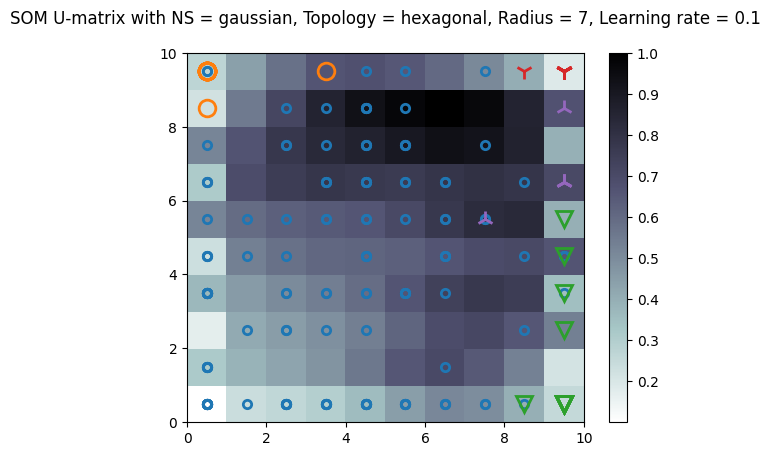

Best NMI information : NMI = 0.4987107182824657, F1-Socre = 0.7184  -->


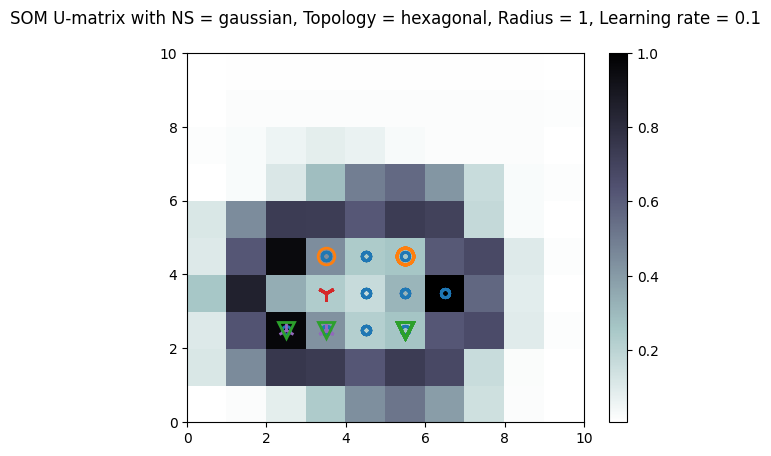

Dataset nci9
Best F1-Score information : F1-Score = 0.4268888888888889, NMI = 0.6379409959626383  -->


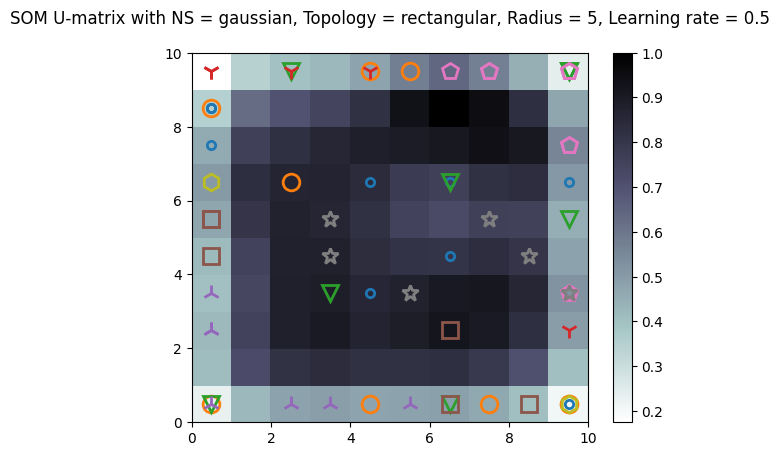

Best NMI information : NMI = 0.6815541565638051, F1-Socre = 0.3412222222222222  -->


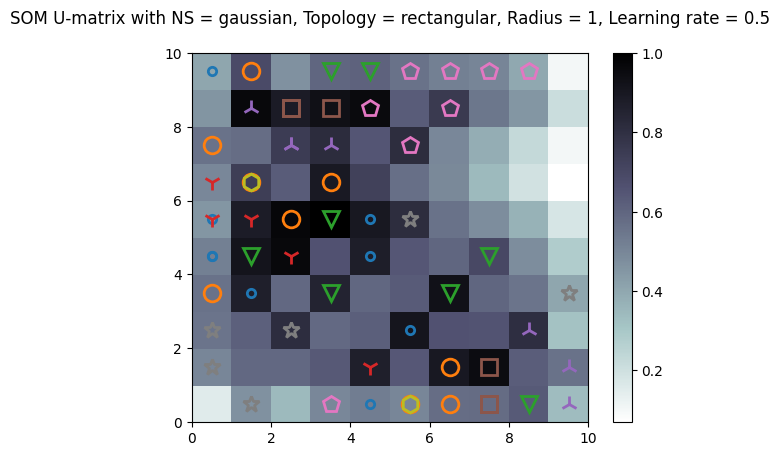

Dataset nci9
Best F1-Score information : F1-Score = 0.422, NMI = 0.6460385263187336  -->


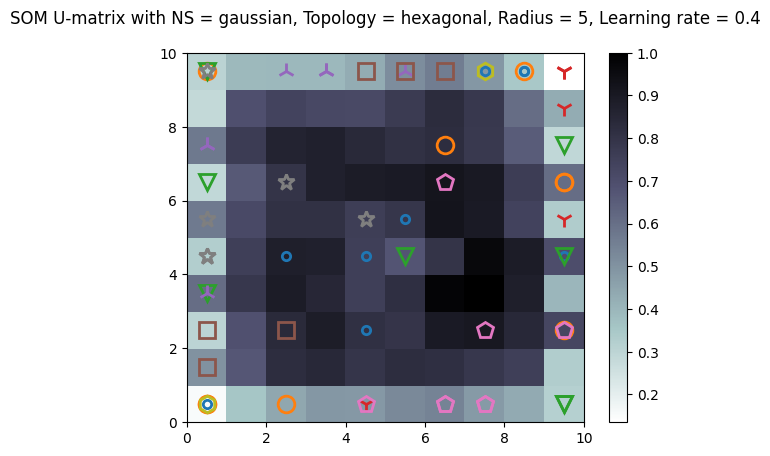

Best NMI information : NMI = 0.6886638098870312, F1-Socre = 0.31444444444444447  -->


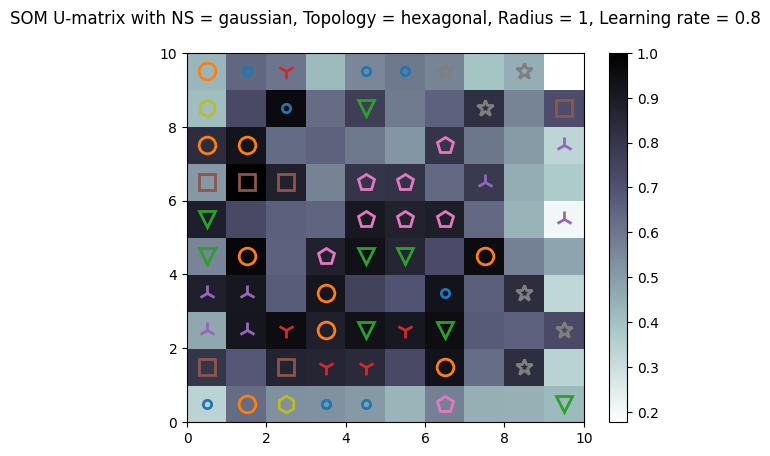

Dataset USPS
Best F1-Score information : F1-Score = 0.5506, NMI = 0.5832709394996545  -->


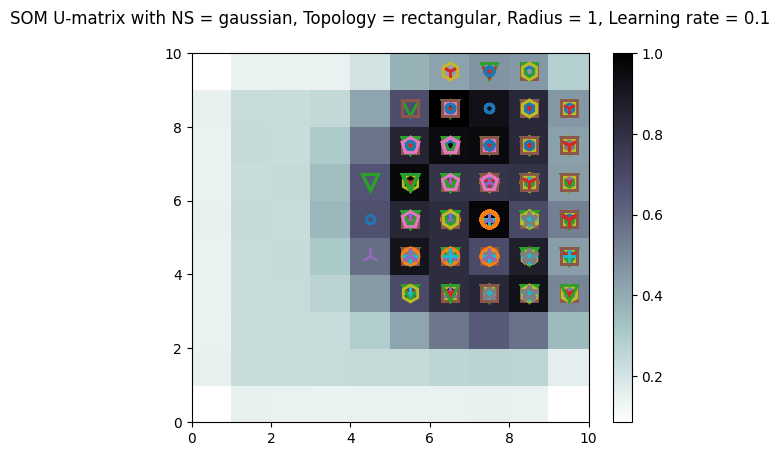

Best NMI information : NMI = 0.5832709394996545, F1-Socre = 0.5506  -->


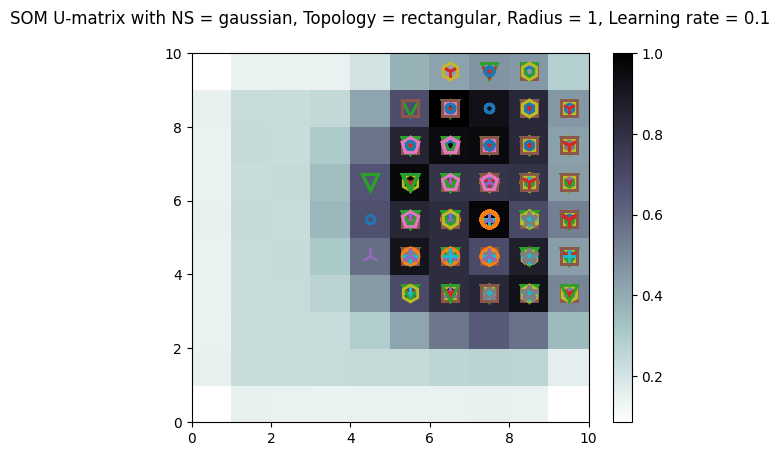

Dataset USPS
Best F1-Score information : F1-Score = 0.5717000000000001, NMI = 0.5886937813745781  -->


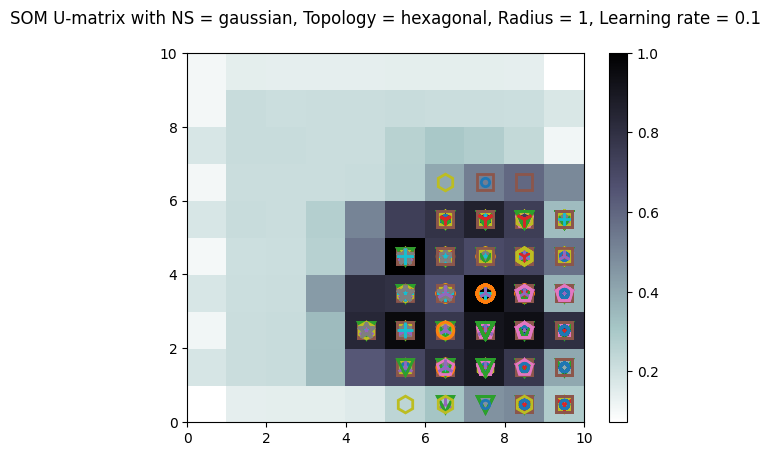

Best NMI information : NMI = 0.5886937813745781, F1-Socre = 0.5717000000000001  -->


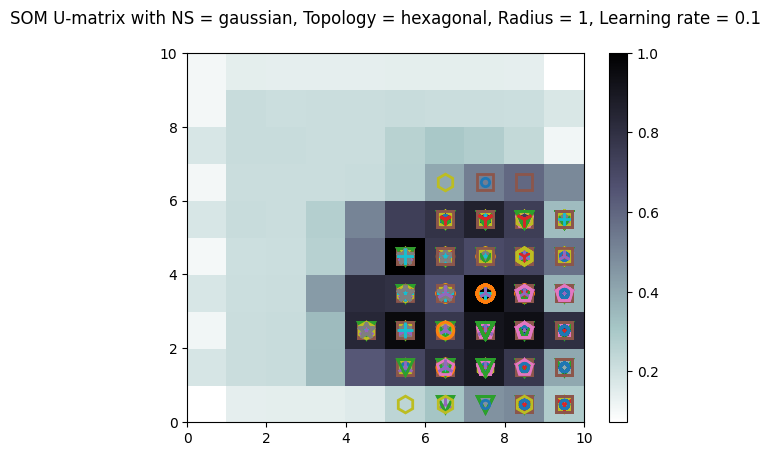

Dataset GLI_85
Best F1-Score information : F1-Score = 0.3145, NMI = 0.15314578641685922  -->


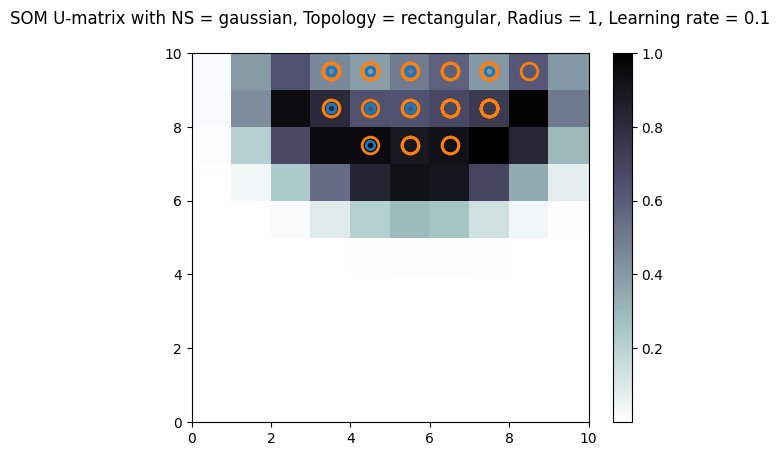

Best NMI information : NMI = 0.2502266415783971, F1-Socre = 0.12  -->


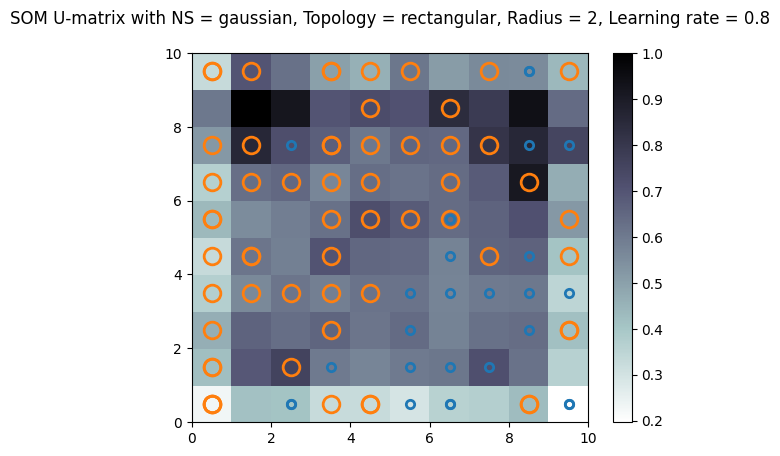

Dataset GLI_85
Best F1-Score information : F1-Score = 0.288, NMI = 0.17194432497034184  -->


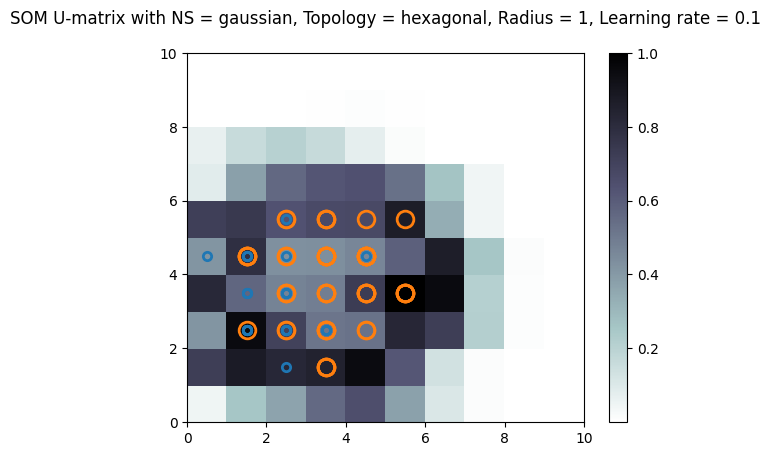

Best NMI information : NMI = 0.23660808430472965, F1-Socre = 0.1045  -->


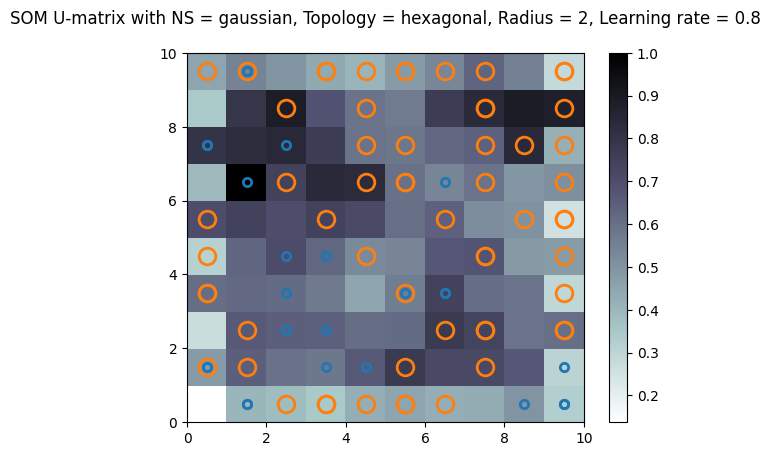

In [85]:
fine_tuning(data, neighborhood_functions, topology, radius, learning_rate)